In [2]:
"""
    https://medium.com/towards-artificial-intelligence/exploring-dataset-with-data-visualization-wine-classification-using-pca-d133427183fb
"""

'\n    https://medium.com/towards-artificial-intelligence/exploring-dataset-with-data-visualization-wine-classification-using-pca-d133427183fb\n'

In [3]:
from sklearn.datasets import load_wine
dataset = load_wine()

In [4]:
print(dataset.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [5]:
import pandas as pd

f = pd.DataFrame(dataset.data)
f.columns = dataset.feature_names
f["class"] = dataset.target
f.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [6]:
f["class"].unique()

array([0, 1, 2])

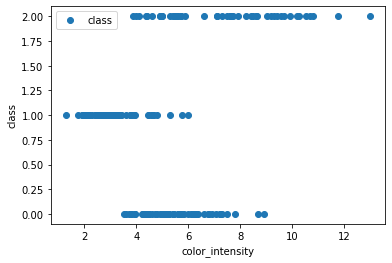

In [7]:
import matplotlib.pylab as plt

f.plot(x="color_intensity", y="class", style="o")
plt.ylabel("class")
plt.show()

In [8]:
TargetName = "class"
FeaturesName = [\
              #-- "Crime occurrence rate per unit population by town"
              "alcohol",\
              #-- "Percentage of 25000-squared-feet-area house"
              'malic_acid',\
              #-- "Percentage of non-retail land area by town"
              'ash',\
              #-- "Index for Charlse river: 0 is near, 1 is far"
              'alcalinity_of_ash',\
              #-- "Nitrogen compound concentration"
              'magnesium',\
              #-- "Average number of rooms per residence"
              'total_phenols',\
              #-- "Percentage of buildings built before 1940"
              'flavanoids',\
              #-- 'Weighted distance from five employment centers'
              "nonflavanoid_phenols",\
              ##-- "Index for easy access to highway"
              'proanthocyanins',\
              ##-- "Tax rate per $100,000"
              'color_intensity',\
              ##-- "Percentage of students and teachers in each town"
              'hue',\
              ##-- "1000(Bk - 0.63)^2, where Bk is the percentage of Black people"
              'od280/od315_of_diluted_wines',\
              ##-- "Percentage of low-class population"
              'proline',\
              ]

In [9]:
X = f[FeaturesName]
Y = f[TargetName]

In [10]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=99)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(124, 13) (54, 13) (124,) (54,)


In [11]:
#GaussianNB
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf = clf.fit(X_train, Y_train)
Y_pre = clf.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test, Y_pre))

0.9814814814814815


In [12]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X_train, Y_train)
Y_pre = clf.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test, Y_pre))
#cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, Y, cv=5)
scores

0.9629629629629629


array([0.83333333, 0.91666667, 0.91666667, 1.        , 0.94285714])

PCA

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X_ = pd.DataFrame(scaler.transform(X))
X_.columns = X.columns
X_
df = X_
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df)
# pca_result

In [14]:
y = f.pop('class')
k = list(y).copy()

import plotly.express as px
fig = plt.figure(figsize=(14, 8))
x = list(pca_result[:,0])
y = list(pca_result[:,1])
z = list(pca_result[:,2])
fig = px.scatter_3d(df, x=x, y=y, z=z, text=k, color=k)
fig.show()

<Figure size 1008x576 with 0 Axes>